In [2]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt

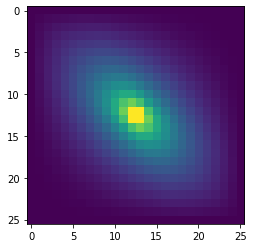

In [4]:
a = np.array([[[2, 1], [1, 2]], [[3, 2], [2, 3]]])
u = np.zeros(shape=(26,26))
v = np.zeros(shape=(26,26))

def source():
    u[12, 12] = 5
    u[12, 13] = 5
    u[13, 12] = 5
    u[13, 13] = 5

source()

for n in range(1000):
    for i in range(1, 25):
        for j in range(1, 25):
            p=a[(i + j) % 2]
            v[i,j] = (p[0, 0] * (u[i + 1, j] + u[i - 1,j]) +
                     (p[0, 1] + p[1, 0]) / 4 * (u[i + 1, j + 1] + u[i - 1,j - 1] - u[i + 1,j - 1] - u[i - 1,j + 1]) +
                      p[1, 1] * (u[i, j + 1] + u[i, j - 1])) / (2*(p[0, 0]+p[1, 1]))
    u = deepcopy(v)
    source()

#Plots
x_values = np.linspace(0, 5, 100)
y_values = np.linspace(0, 5, 100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(u)

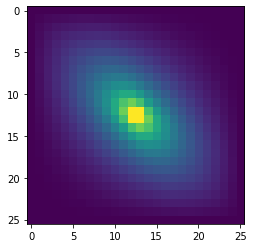

In [28]:
a = np.array([[[2, 1], [1, 2]], [[3, 2], [2, 3]]])
u_old = np.zeros(shape=(26,26))
u = np.zeros(shape=(26, 26))
v = np.zeros(shape=(26,26))

def source():
    u[12, 12] = 5
    u[12, 13] = 5
    u[13, 12] = 5
    u[13, 13] = 5

source()

while np.linalg.norm(u_old-u) > 0.000001:
    u_old = u
    for i in range(1, 25):
        for j in range(1, 25):
            p=a[(i + j) % 2]
            v[i,j] = (p[0, 0] * (u[i + 1, j] + u[i - 1,j]) +
                     (p[0, 1] + p[1, 0]) / 4 * (u[i + 1, j + 1] + u[i - 1,j - 1] - u[i + 1,j - 1] - u[i - 1,j + 1]) +
                      p[1, 1] * (u[i, j + 1] + u[i, j - 1])) / (2*(p[0, 0]+p[1, 1]))
    u = deepcopy(v)
    source()

#Plots
x_values = np.linspace(0, 5, 100)
y_values = np.linspace(0, 5, 100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(u)

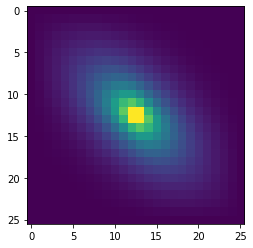

In [6]:
#one instance of random distribution of microstructures
a = np.array([[[2, 1], [1, 2]],[[3, 2], [2, 3]]])
u = np.zeros(shape=(26,26))
v = np.zeros(shape=(26,26))
k = np.random.choice([0,1], size=(26,26),p=(0.5,0.5))
source()
for n in range(100):
    for i in range(1, 25):
        for j in range(1, 25):
            v[i,j] = (a[k[i,j]][0, 0] * (u[i+1, j] + u[i-1,j]) +
                     (a[k[i,j]][0, 1] + a[k[i,j]][1, 0]) / 4 * (u[i+1, j+1] + u[i-1,j-1] -u[i+1,j-1]-u[i-1,j+1]) +
                      a[k[i,j]][1, 1] * (u[i,j+1] + u[i,j-1])) / (2*(a[k[i,j]][0,0]+a[k[i,j]][1,1]))
    u = deepcopy(v)
    source()

#Plots
x_values = np.linspace(0,5,100)
y_values = np.linspace(0,5,100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(u)

In [30]:
np.random.seed(1)
r = np.zeros(shape=(26, 26))
for n in range(100):
    a = np.array([[[2, 1], [1, 2]], [[3, 2], [2, 3]]])
    u = np.zeros(shape=(26, 26))
    u_old = np.zeros(shape=(26, 26))
    v = np.zeros(shape=(26, 26))
    k = np.random.randint(0, 2, size=(26,26))
    source()
    while np.linalg.norm(u_old - u) > 0.001:
        u_old = u
        for i in range(1,25):
            for j in range(1,25):
                v[i,j] = (a[k[i,j]][0, 0] * (u[i+1, j] + u[i-1,j]) +
                         (a[k[i,j]][0, 1] + a[k[i,j]][1, 0]) / 4 * (u[i+1, j+1] + u[i-1,j-1] -u[i+1,j-1]-u[i-1,j+1]) +
                          a[k[i,j]][1, 1] * (u[i,j+1] + u[i,j-1])) / (2*(a[k[i,j]][0,0]+a[k[i,j]][1,1]))
        u = deepcopy(v)
        source()
    r = r + u

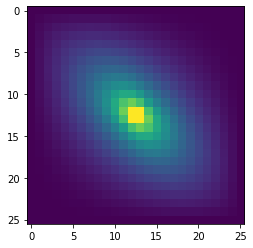

In [31]:
x_values = np.linspace(0, 5, 100)
y_values = np.linspace(0, 5, 100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(r / 100)


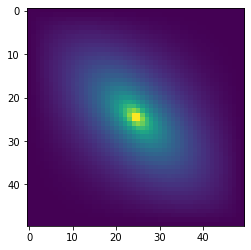

In [19]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt


a = np.array([[[2, 1],[1, 2]], [[3, 2], [2, 3]]])
u = np.zeros(shape=(50,50))
v = np.zeros(shape=(50,50))
def source_2():
    u[24, 24] = 10
    u[24, 25] = 10
    u[25, 24] = 10
    u[25, 25] = 10

for n in range(1000):
    for i in range(1, 49):
        for j in range(1, 49):
            p=a[(i + j) % 2]
            v[i,j] = (p[0, 0] * (u[i+1, j] + u[i-1,j]) +
                     (p[0, 1] + p[1, 0]) / 4 * (u[i+1, j+1] + u[i-1,j-1] - u[i+1,j-1] - u[i-1,j+1]) +
                      p[1, 1] * (u[i,j+1] + u[i,j-1])) / (2*(p[0,0]+p[1,1]))
    u = deepcopy(v)
    source_2()

#Plots
x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(u)


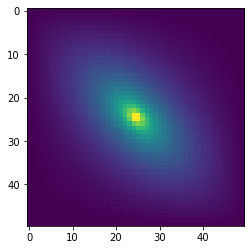

In [20]:
np.random.seed(1)
r = np.zeros(shape=(50,50))
for t in range(100):
    a = np.array([[[2, 1], [1, 2]], [[3, 2], [2, 3]]])
    u = np.zeros(shape=(50,50))
    v = np.zeros(shape=(50,50))
    k = np.random.randint(0, 2, size=(50, 50))
    source_2()
    for n in range(1000):
        for i in range(1, 49):
            for j in range(1, 49):
                v[i,j] = (a[k[i,j]][0, 0] * (u[i+1, j] + u[i-1,j]) +
                         (a[k[i,j]][0, 1] + a[k[i,j]][1, 0]) / 4 * (u[i+1, j+1] + u[i-1,j-1] -u[i+1,j-1]-u[i-1,j+1]) +
                          a[k[i,j]][1, 1] * (u[i,j+1] + u[i,j-1])) / (2*(a[k[i,j]][0,0]+a[k[i,j]][1,1]))
        u = deepcopy(v)
        source_2()
    r = r + u

x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(r / 100)

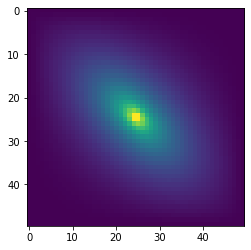

In [21]:
# One instance of random
np.random.seed(1)

a = np.array([[[2, 1], [1, 2]], [[3, 2], [2, 3]]])
u = np.zeros(shape=(50,50))
v = np.zeros(shape=(50,50))
k = np.random.randint(0, 2, size=(50, 50))
source_2()
for n in range(1000):
    for i in range(1, 49):
        for j in range(1, 49):
            v[i,j] = (a[k[i,j]][0, 0] * (u[i+1, j] + u[i-1,j]) +
                     (a[k[i,j]][0, 1] + a[k[i,j]][1, 0]) / 4 * (u[i+1, j+1] + u[i-1,j-1] -u[i+1,j-1]-u[i-1,j+1]) +
                      a[k[i,j]][1, 1] * (u[i,j+1] + u[i,j-1])) / (2*(a[k[i,j]][0,0]+a[k[i,j]][1,1]))
    u = deepcopy(v)
    source_2()


x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(u)

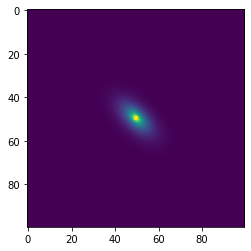

In [16]:
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt


a = np.array([[[2, 1],[1, 2]], [[3, 2], [2, 3]]])
u = np.zeros(shape=(100, 100))
v = np.zeros(shape=(100, 100))
def source_3():
    u[49, 49] = 10
    u[49, 50] = 10
    u[50, 49] = 10
    u[50, 50] = 10

for n in range(1000):
    for i in range(1, 99):
        for j in range(1, 99):
            p=a[(i + j) % 2]
            v[i,j] = (p[0, 0] * (u[i+1, j] + u[i-1,j]) +
                     (p[0, 1] + p[1, 0]) / 4 * (u[i+1, j+1] + u[i-1,j-1] - u[i+1,j-1] - u[i-1,j+1]) +
                      p[1, 1] * (u[i,j+1] + u[i,j-1])) / (2*(p[0,0]+p[1,1]))
    u = deepcopy(v)
    source_3()

#Plots
x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(u)

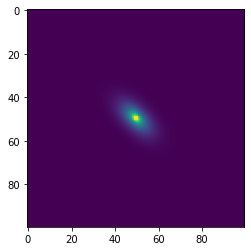

In [18]:
# One instance of random
np.random.seed(1)

a = np.array([[[2, 1], [1, 2]], [[3, 2], [2, 3]]])
u = np.zeros(shape=(100,100))
v = np.zeros(shape=(100,100))
k = np.random.randint(0, 2, size=(100, 100))
source_3()
for n in range(100):
    for i in range(1, 99):
        for j in range(1, 99):
            v[i,j] = (a[k[i,j]][0, 0] * (u[i+1, j] + u[i-1,j]) +
                     (a[k[i,j]][0, 1] + a[k[i,j]][1, 0]) / 4 * (u[i+1, j+1] + u[i-1,j-1] -u[i+1,j-1]-u[i-1,j+1]) +
                      a[k[i,j]][1, 1] * (u[i,j+1] + u[i,j-1])) / (2*(a[k[i,j]][0,0]+a[k[i,j]][1,1]))
    u = deepcopy(v)
    source_3()


x_values = np.linspace(0,10,100)
y_values = np.linspace(0,10,100)
x, y = np.meshgrid(x_values, y_values)
plt.imshow(u)